# An Analysis on Buying Statistically “Cheap” vs “Expensive” Stocks

Everyone understands the idea that you are supposed to buy high and sell low. But thinking back since the end of the technology bubble in 2001, we can say without question that some of the best performing stocks of the last twenty years have been technology stocks, and one thing that we know about many of these stocks is that they have never been statistically cheap. That brings us to the first question, what is a cheap stock? For our purposes, we will use metrics defined by Ron Bird and & Lorenzo Casavecchia in their paper Sentiment and financial health indicators for value and growth stocks: The European experience. They identified three main valuation metrics that are often used to determine if stocks are cheap of if they are expensive. Those three are book to market, sales to price, and earnings to price (cite). We will look at these as well as other metrics to try to determine if you would be better off buying a group of statistically cheap stocks, or if you would be better off buying the more expensive stocks in order to be more likely to have the next Google in your portfolio. The purpose of trying to pick stocks of course is to try to beat the market generally, for the market as a whole, we will use the S&P 500 as our benchmark, because finding if our findings do not outperform the S&P 500, then it is not worth our time to use the strategies we are considering. Lastly, the time period that we will be using will be from March 3rd, 2009 (the lowest point during the housing crisis) through September 29, 2022 (the lowest point in the current market downturn). During that time, the S&P returned roughly 15% when you assume dividends were reinvested over this period. This means we need to try to find a strategy that will produce a return of better that 15% over that same period. It is important to note that these returns are before taxes, taxes would play an important factor in the amount of realized returns and would make a material difference depending on if all returns are paid out as dividends or if all of the gains are kept in the company leading to an increased stock price. This fact will be ignored for this paper.

A quick look at the scatter plot (below) of the companies in the highest 25th percentile of stocks and lowest in term of price to earnings as well as their annualized performance shows some interesting results at a first glance (note, companies with negative price to earnings ratios were not considered). The scatter plot shows that basically anyone would have done relatively well picking stocks over this time period as out of the 324 stocks that came through my screener, exactly two-thirds (216) produced at least of 10% annually with dividends reinvested, regardless of if these stocks were in the low or high price to earnings category. However, we mentioned that we are hoping for at least a 15% return, still a person randomly choosing stocks would have a chance to beat the S&P 500 as 144 out of the 324 stocks in the screener produced returns of at least 15% annually over the timeframe. Companies with price to earnings of less than 6.75 (the lowest 25th percentile) had a 48% chance of returning at least 15% annually  with 79 of the 162 companies  bearing that hurdle rate. For the companies with a price to earnings of over 13.75 (the highest 75th percentile) these companies had a 40.12% chance of achieving a return of at least 15% annual over the allotted time. Even this still does not tell the entire story thought as we can look at the performance of the highest performers and see how much of an impact they have on the total return of a theoretical portfolio.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data = pd.read_excel("Econ 411 Data Set 2.xlsx")
df1 = pd.DataFrame(data)
df1

,Ticker,Short Name,Market Cap:20090309,P/E:20090309,Percentile Rank(P/E as of 20090309),Total Return:20090309:20220929 (including dividends),Market Cap:20220929,Total Return:20090309:20220929 (annualized including dividends),Unnamed: 8
0,TXP CN Equity,TOUCHSTONE EXPLO,1.661330e+00,0.333624,1.0,-36.868274,2.441166e-01,-3.333335,0.0
1,HIG US Equity,HARTFORD FINL SV,1.333441e+00,0.432946,1.0,1880.923503,2.024487e+01,24.620359,1.0
2,ONEX CN Equity,ONEX CORP,1.599594e+00,0.964650,1.0,405.418319,5.366819e+00,12.684562,0.0
3,X US Equity,US STEEL CORP,2.024171e+00,0.967536,1.0,18.093743,4.398189e+00,1.233364,0.0
4,TECK/B CN Equity,TECK RESOURCES-B,1.853044e+00,1.072046,1.0,1338.918694,2.221067e+01,21.718352,1.0
...,...,...,...,...,...,...,...,...,...
320,TFSL US Equity,TFS FINANCIAL CO,3.526884e+09,75.466665,100.0,73.889937,3.665814e+09,4.162178,0.0
321,RGLD US Equity,ROYAL GOLD INC,1.299480e+09,81.297871,100.0,183.810403,6.099237e+09,7.992010,0.0
322,CRM US Equity,SALESFORCE INC,3.768580e+09,88.050851,100.0,1801.068313,1.468100e+11,24.242975,1.0
323,NJR US Equity,NEW JERSEY RES,1.309337e+09,88.324045,100.0,303.652235,3.821229e+09,10.832555,0.0


/var/folders/7l/h6dgk4zj46v592scp_p1cgwr0000gn/T/ipykernel_64271/2484475428.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels)


[Text(0.0, 0, '0%'),
 Text(0.2, 0, '1%'),
 Text(0.4, 0, '2%'),
 Text(0.6000000000000001, 0, '3%'),
 Text(0.8, 0, '4%'),
 Text(1.0, 0, '5%')]

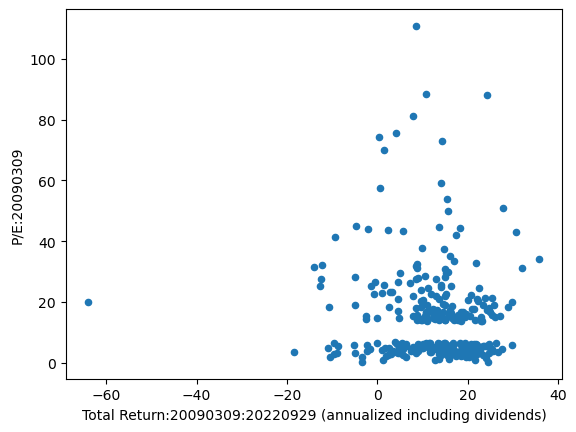

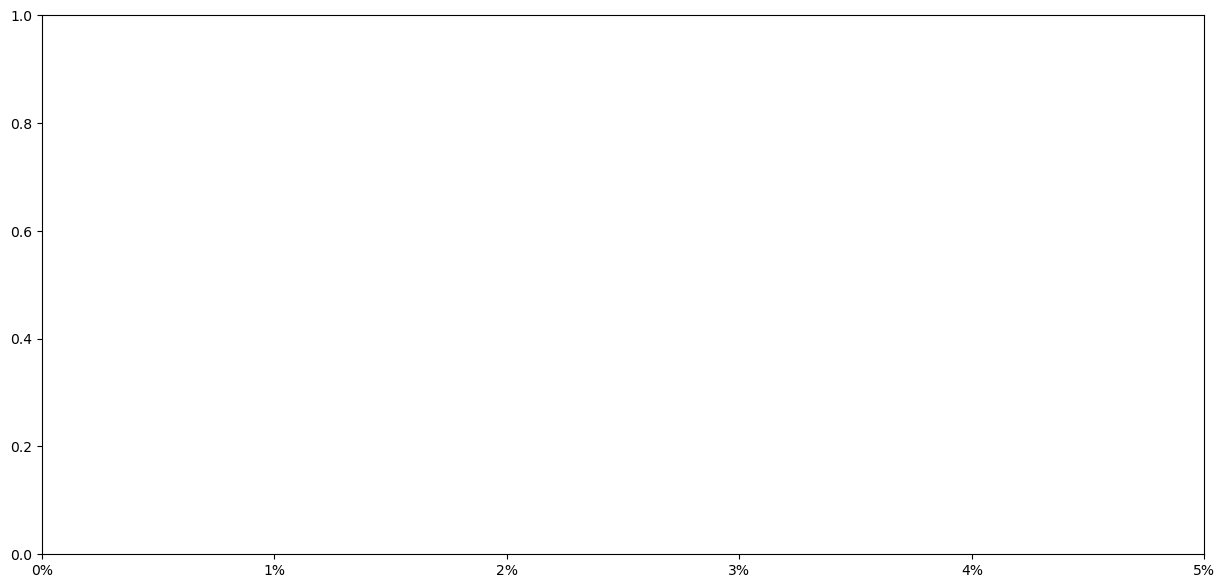

In [18]:
df1.plot.scatter("Total Return:20090309:20220929 (annualized including dividends)","P/E:20090309")
fig, ax = plt.subplots(figsize = (15,7))
x_ticklabels = [str(x) + '%' for x in df1.index]
ax.set_xticklabels(x_ticklabels)

Another way of measuring the relative cheapness of a company is looking at their price to sales of the companies. To do that, we can plot companies on a graph with the price to sales graph on one axis and annualized return on the other axis. This particular graph is harder to take much away from due to the fact that there is a significant outlier. If we take out the outlier though, a couple of things pop out immediately, first three companies with the highest individual returns are all companies in the highest 25th percentile of price to sales, but the companies are all near the bottom of the range, all with price to sales of under-five. The next thing that jumps out is how few of the companies with low price to sales had negative returns compared to the number of high price to sales companies. Only six of 171 companies in the low price to sales ratio group had negative returns over the investment timeframe, so less than 4% of the companies in that group. The high price to sales ratio group on the other hand had 22 of their 172 companies record negative returns over the investment period resulting in just under 13% of those companies providing negative returns over the period for their shareholders. When we look at the percentage of companies that record over a 15% annual return during the investment timeframe, companies with price to sales ratios below 0.4 (the bottom 25%) had a 50.87% chance (87 of 171) of returning over 15% annually during the investment period. On the other hand, companies with a price to sales over 1.66 (the 75th percentile) had a 35.47% chance (61/172) of returning over 15% annually over the same period. The entire group had a 43% rate (148/343) of beating the 15% hurdle rate over the investment period meaning that someone could with a small selection of stocks beat the S&P 500 by random luck, but both the price to earnings and the price to sales seem to suggest that companies that are statistically cheap will have better performance over a full market cycle.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data2 = pd.read_excel("Data for Econ 411.xlsx")
df = pd.DataFrame(data2)
df

,Ticker,Short Name,Total Return:20090309:20220929,Market Cap (Billions),Total Return:20090309:20220929 (Annualized),Market Cap:20090309 (Billions),P/S:20090309,Percentile Rank(P/S as of 20090309),Unnamed: 8,Unnamed: 9
0,FMCC US Equity,FREDDIE MAC,40.675675,1.519716e+09,2.547450,1.191287,0.012687,1.0,0.0,NaN
1,FNMA US Equity,FANNIE MAE,32.358981,2.708254e+00,2.087872,2.117313,0.017650,1.0,0.0,NaN
2,F US Equity,FORD MOTOR CO,898.855659,5.335196e+01,18.487065,4.169598,0.027093,1.0,1.0,NaN
3,FLEX US Equity,FLEX LTD,807.526830,1.061845e+10,17.652596,1.505777,0.046423,1.0,1.0,NaN
4,ONEX CN Equity,ONEX CORP,405.418319,5.652614e+00,12.684562,1.599594,0.049200,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
339,FNV CN Equity,FRANCO-NEVADA CO,618.215935,3.745693e+01,15.641175,2.666977,13.396963,100.0,1.0,NaN
340,RGLD US Equity,ROYAL GOLD INC,183.810403,8.412898e+00,7.992010,1.299480,18.018374,100.0,0.0,NaN
341,AEM CN Equity,AGNICO EAGLE MIN,9.428289,3.452028e+01,0.666310,9.709309,18.918057,100.0,0.0,NaN
342,VRTX US Equity,VERTEX PHARM,986.053404,8.251347e+01,19.220269,4.103037,21.458390,100.0,1.0,NaN


In [5]:
data2[["Total Return:20090309:20220929 (Annualized)",'P/S:20090309' ]]

,Total Return:20090309:20220929 (Annualized),P/S:20090309
0,2.547450,0.012687
1,2.087872,0.017650
2,18.487065,0.027093
3,17.652596,0.046423
4,12.684562,0.049200
...,...,...
339,15.641175,13.396963
340,7.992010,18.018374
341,0.666310,18.918057
342,19.220269,21.458390


<AxesSubplot:xlabel='Total Return:20090309:20220929 (Annualized)', ylabel='P/S:20090309'>

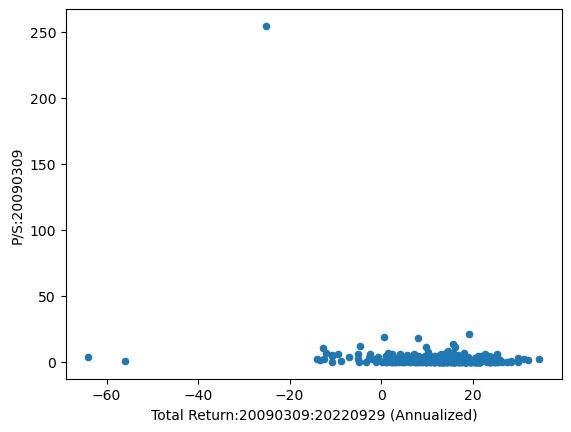

In [7]:
df.plot.scatter("Total Return:20090309:20220929 (Annualized)",'P/S:20090309')

<AxesSubplot:xlabel='Total Return:20090309:20220929 (Annualized)', ylabel='P/S:20090309'>

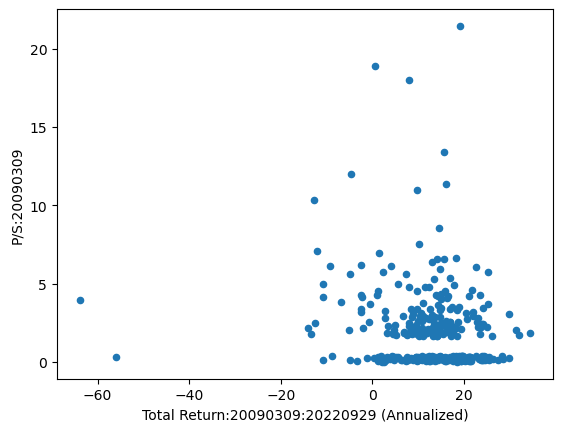

In [8]:
df = df.drop(df.index[-1])
df.plot.scatter("Total Return:20090309:20220929 (Annualized)",'P/S:20090309')